In [19]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [57]:
# function that generates a n dimensional matrix of k samples of the guassian distribution

def GaussianSamples(mu, sigma, points):
    gaussian_samples = np.random.normal(mu, sigma, (points,2))
    
    return [tuple(sample) for sample in gaussian_samples]
    


In [66]:
def in_rectangle(point, center, width, height):
    x, y = point[0], point[1]

    if (x < center[0] + width/2.0) and (x > center[0] - width/2.0) and (y < center[1] + height/2.0) and (y > center[1] - height/2.0):
        return True
        
    return False

def in_circle(point, center, radius):
    x, y = point[0], point[1]

    distance = math.sqrt( (center[0] - x)**2 + (center[1] - y)**2 )

    if radius > distance:
        return True
        
    return False

In [58]:
# Create a 2 dimensional sample of 10 points generated y the gaussian distribution
samples = GaussianSamples(mu=0, sigma=1, points=100)

# Display first 20 rows
samples[:20]

[(0.092306078985486914, 1.3253364311709517),
 (1.4389817510202838, 0.018797015371122574),
 (-0.67076975048781173, -0.71279417995133854),
 (-0.23983288300075709, -0.11930117936267073),
 (0.21809376622653354, 0.2457451777560182),
 (-0.27723387546154554, 1.1769992888396681),
 (0.52022480336427979, 1.2117979461474055),
 (1.2577972627924825, -0.68473272094149862),
 (-0.24512314189081111, 0.69709797594623779),
 (-2.1779191127496622, 0.3595130144777991),
 (0.64609717504332076, 1.8496008479180102),
 (-0.11462706263616101, -0.16145798816264403),
 (-0.45147002801427399, -0.046814606410303078),
 (-0.31257820420501081, 1.1956702445160987),
 (1.731199472882631, 1.0243687432868738),
 (-1.8306018628087344, 0.9600089853101873),
 (-0.51848064986902964, 0.58273199938614695),
 (-0.15206387572550675, -0.39114061621940999),
 (-0.80413981884287178, 1.0936454012813979),
 (-1.1006363984553853, 0.64118014684257363)]

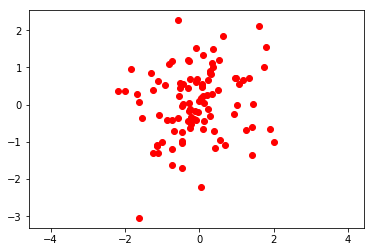

In [59]:
# Plot the points

fig1 = plt.figure()
x = [point[0] for point in samples]
y = [point[1] for point in samples]
fig1 = plt.plot(x, y, 'ro')
plt.axis('equal')

plt.show()

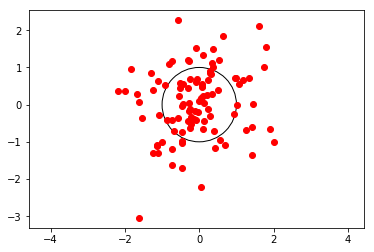

In [60]:
# Plot points with circle

fig2, ax = plt.subplots(1)

x = [point[0] for point in samples]
y = [point[1] for point in samples]
fig2 = plt.plot(x, y, 'ro')
circle = plt.Circle((0,0), radius=1, fill = False)
ax.add_artist(circle)
plt.axis('equal')

plt.show()

In [64]:
# The approximate probability that a point generated from the Gaussian distribution ends up in the above circle.

circle_probability = sum([1 for sample in samples if in_circle(point=sample, center=(0,0), radius=1)])/len(samples)

circle_probability

0.47

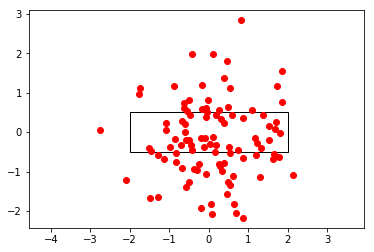

In [15]:
# Plot points with a rectangle

fig3, ax = plt.subplots(1)
fig3 = plt.plot(samples[0], samples[1], 'ro')
rectangle = patches.Rectangle((-2,-.5), 4, 1, fill = False)
ax.add_patch(rectangle)
plt.axis('equal')

plt.show()

In [67]:
# The approximate probability that a point generated from the Gaussian distribution ends up in the above rectangle.

rectangle_probability = sum([1 for sample in samples if in_rectangle(point=sample, center=(0,0), height=4, width=1)])/len(samples)

rectangle_probability

0.49

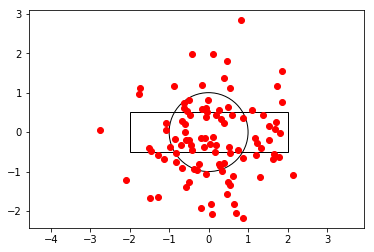

In [16]:
# Plot points with circle and rectangle

fig4, ax = plt.subplots(1)
fig4 = plt.plot(samples[0], samples[1], 'ro')
rectangle = patches.Rectangle((-2,-.5), 4, 1, fill = False)
circle = plt.Circle((0,0), radius=1, fill = False)
ax.add_artist(circle)
ax.add_patch(rectangle)
plt.axis('equal')

plt.show()

In [69]:
# The approximate probability that a point generated from the Gaussian distribution ends up in the above rectangle and circle.

rectangle_circle_probability = sum([1 for sample in samples if in_rectangle(point=sample, center=(0,0), height=4, width=1) and in_circle(point=sample, center=(0,0), radius=1)])/len(samples)

rectangle_circle_probability

0.38

In [70]:
rectangle_circle_probability >= circle_probability * rectangle_probability

True